## Data Preprocessing

The dataset is obtained from the Seventeenth release of Sloan Digital Sky Surveys (SDSS - DR17). The dataset consists of 100,000 data points with 18 attributes including the class of astronomical objects.

In [226]:
import pandas as pd # For Dataframe manupulation
import numpy as np # For arrays manipulation

#### Data Cleansing

In [227]:
df = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification.csv") # Importing astronomical objects dataset
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [228]:
# Handling missing values

null_counts = df.isnull().sum() # To Count the null values in each column

print(null_counts) # to print the null counts for each column

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


There are no null values in the dataset.

In [229]:
# Handling duplicate values

# To Count the duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

duplicate_count

0

There are no duplicate rows in the dataset

Outliers were not removed from the dataset , because there could be data with a wide range of spectral features due to the difference of each astronomical object. Otherwise there could be loss of important information, Biasing of the model and Overfitting.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


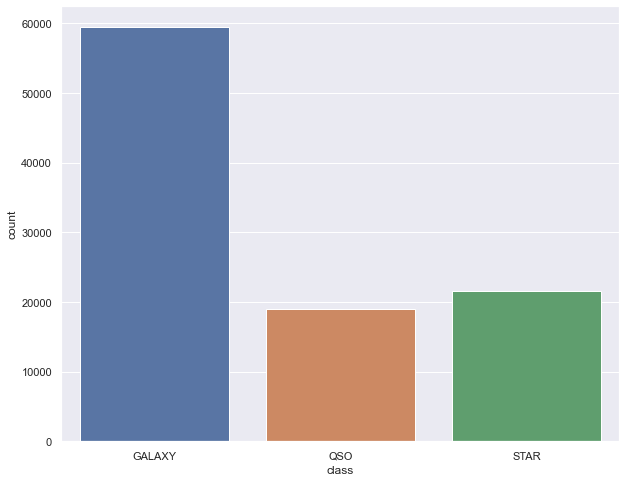

In [230]:
# visualizing distribution of each class

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(df['class'])
plt.show()

In [231]:
# to obtaing number of objects from each class
value_counts = df['class'].value_counts()

print(value_counts)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


According to the above analysis, it shows that there is a imbalance in the dataset considering the class feature.As a solution the dataset is undersampled with the RandomUnderSampler function.

#### Data Undersampling

In [232]:

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# separating the features and target variable
x = df.drop('class', axis=1)
y = df['class']

# applying RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x, y)

# creating a new DataFrame with the undersampled dataset
dfr = pd.concat([x_resampled, y_resampled], axis=1)

# replacing the original dataset with the undersampled dataset
df = dfr

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


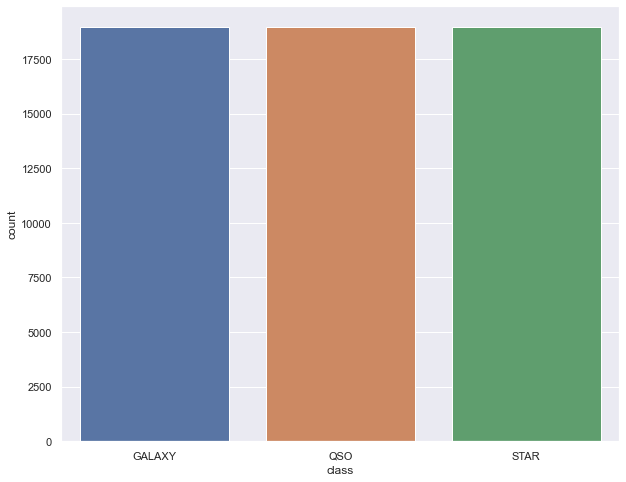

In [233]:
# checking the status of the dataset after oversampling

# visualizing distribution of each class after oversampling

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(dfr['class'])
plt.show()

In [234]:
# obtaing number of objects from each class after oversampling
value_counts = dfr['class'].value_counts()

print(value_counts)

GALAXY    18961
QSO       18961
STAR      18961
Name: class, dtype: int64


#### Data Reduction

In [235]:
# To select a subset of columns
columns_to_keep = ['alpha', 'delta', 'u','g','r','i','z','redshift','class']
dfr = dfr[columns_to_keep]

dfr

,alpha,delta,u,g,r,i,z,redshift,class
0,200.542414,3.218414,21.39300,20.78523,19.95056,19.19990,18.75250,0.511082,GALAXY
1,182.472158,58.393904,22.36432,18.35069,24.80829,24.36098,17.71328,0.082302,GALAXY
2,193.740763,-2.863319,23.44303,20.92590,19.11927,18.45186,17.99936,0.431232,GALAXY
3,186.680845,46.277453,21.62368,20.56437,18.89316,18.14744,17.67336,0.399548,GALAXY
4,149.309806,56.624033,20.84340,18.86434,17.65145,17.18403,16.86077,0.187646,GALAXY
...,...,...,...,...,...,...,...,...,...
56878,316.387630,10.551688,18.35345,16.75504,16.17271,15.94065,15.78155,-0.000106,STAR
56879,109.232819,-0.439860,20.76409,18.35910,17.26433,16.84440,16.61955,-0.000020,STAR
56880,250.915936,31.855990,23.47200,20.75155,19.21069,17.25308,16.16824,-0.000191,STAR
56881,234.039603,42.339483,26.82596,24.97817,22.24501,20.84374,19.35893,-0.000164,STAR


#### Data Transforming

In [236]:
from sklearn.preprocessing import LabelEncoder

# To create a LabelEncoder object
le = LabelEncoder()

# To encode categorical variables
dfr['class'] = le.fit_transform(df['class'])
dfr

C:\Users\Asus\AppData\Local\Temp\ipykernel_12624\1752500157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['class'] = le.fit_transform(df['class'])


,alpha,delta,u,g,r,i,z,redshift,class
0,200.542414,3.218414,21.39300,20.78523,19.95056,19.19990,18.75250,0.511082,0
1,182.472158,58.393904,22.36432,18.35069,24.80829,24.36098,17.71328,0.082302,0
2,193.740763,-2.863319,23.44303,20.92590,19.11927,18.45186,17.99936,0.431232,0
3,186.680845,46.277453,21.62368,20.56437,18.89316,18.14744,17.67336,0.399548,0
4,149.309806,56.624033,20.84340,18.86434,17.65145,17.18403,16.86077,0.187646,0
...,...,...,...,...,...,...,...,...,...
56878,316.387630,10.551688,18.35345,16.75504,16.17271,15.94065,15.78155,-0.000106,2
56879,109.232819,-0.439860,20.76409,18.35910,17.26433,16.84440,16.61955,-0.000020,2
56880,250.915936,31.855990,23.47200,20.75155,19.21069,17.25308,16.16824,-0.000191,2
56881,234.039603,42.339483,26.82596,24.97817,22.24501,20.84374,19.35893,-0.000164,2


In [237]:
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


#### Data Normalization

##### Normalization using min-max method

In [238]:
# Copying df dataset for min_max normalization
dfn = dfr.copy()

In [239]:
# Selecting the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the minimum and maximum values of each column
min_vals = dfn[cols_to_normalize].min()
max_vals = dfn[cols_to_normalize].max()

# Normalizing each column using the min-max method
dfn[cols_to_normalize] = (dfn[cols_to_normalize] - min_vals) / (max_vals - min_vals)

In [240]:
dfn

,alpha,delta,u,g,r,i,z,redshift,class
0,0.557056,0.216177,0.998865,0.999190,0.576300,0.429172,0.998999,0.073644,0
1,0.506860,0.758251,0.998962,0.998948,0.852700,0.656817,0.998895,0.012538,0
2,0.538162,0.156427,0.999069,0.999204,0.529001,0.396177,0.998924,0.062265,0
3,0.518551,0.639212,0.998888,0.999168,0.516135,0.382750,0.998891,0.057749,0
4,0.414741,0.740863,0.998810,0.998999,0.445483,0.340256,0.998810,0.027551,0
...,...,...,...,...,...,...,...,...,...
56878,0.878854,0.288223,0.998562,0.998789,0.361345,0.285412,0.998703,0.000794,2
56879,0.303414,0.180236,0.998802,0.998949,0.423457,0.325275,0.998786,0.000806,2
56880,0.696985,0.497528,0.999072,0.999187,0.534203,0.343301,0.998741,0.000782,2
56881,0.650105,0.600524,0.999406,0.999609,0.706852,0.501678,0.999059,0.000785,2


In [241]:
# Save the normalized dataset to a new CSV file
dfn.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm.csv",index = False)

##### Normalization using Z-Score method

In [242]:
# Copying df dataset for Z-Score normalization
dfz = dfr.copy()

In [243]:
# Select the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the mean and standard deviation of each column
mean_vals = dfz[cols_to_normalize].mean()
std_vals = dfz[cols_to_normalize].std()

# Normalizing each column using the z-score method
dfz[cols_to_normalize] = (dfz[cols_to_normalize] - mean_vals) / std_vals


In [244]:
dfz

,alpha,delta,u,g,r,i,z,redshift,class
0,0.230826,-1.075129,-0.004656,0.011371,0.126870,-0.042535,-0.002085,-0.221492,0
1,0.046081,1.704776,0.018432,-0.046518,2.786340,2.862241,-0.026803,-0.690056,0
2,0.161288,-1.381545,0.044072,0.014716,-0.328237,-0.463550,-0.019999,-0.308750,0
3,0.089109,1.094313,0.000827,0.006119,-0.452026,-0.634884,-0.027753,-0.343374,0
4,-0.292962,1.615604,-0.017719,-0.034305,-1.131827,-1.177114,-0.047080,-0.574937,0
...,...,...,...,...,...,...,...,...,...
56878,1.415196,-0.705657,-0.076904,-0.084460,-1.941395,-1.876917,-0.072750,-0.780109,2
56879,-0.702698,-1.259444,-0.019604,-0.046318,-1.343764,-1.368266,-0.052818,-0.780015,2
56880,0.745831,0.367717,0.044761,0.010570,-0.278187,-1.138251,-0.063553,-0.780202,2
56881,0.573292,0.895906,0.124482,0.111071,1.383017,0.882656,0.012339,-0.780173,2


In [245]:
# Saving the normalized dataset to a new CSV file
dfz.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_zc.csv",index = False)